In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Activation, Dropout 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score,f1_score,precision_score
 

In [37]:
csvPath = r"C:\Users\YSK\Desktop\1030520813_patternrecognition_final_project\breast-cancer.csv"
dataset = pd.read_csv(csvPath)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
dataset['diagnosis'] = dataset['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

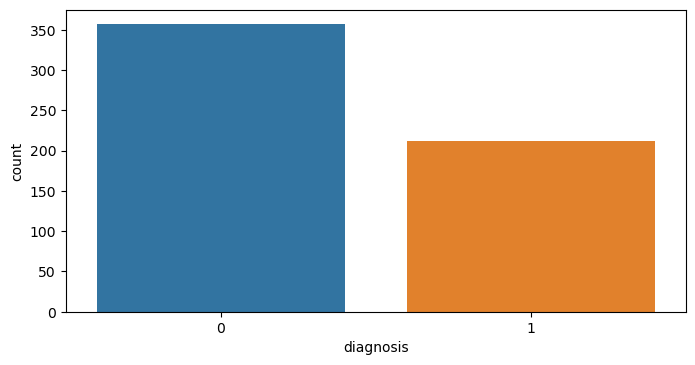

In [39]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.countplot(data = dataset, x = 'diagnosis')
plt.show()

<AxesSubplot:>

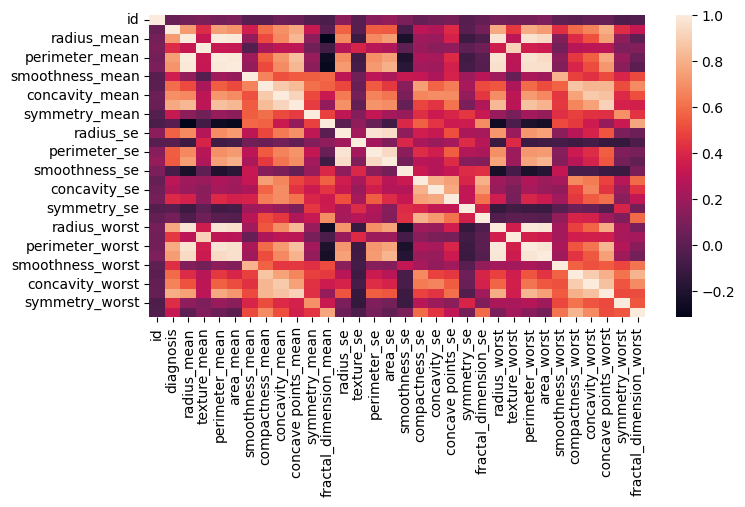

In [40]:

plt.figure(figsize = (8, 4), dpi = 100)
sns.heatmap(dataset.corr())

In [41]:
X = dataset.drop('diagnosis', axis = 1).values
sc = StandardScaler()
X=sc.fit_transform(X)
y = dataset['diagnosis'].values 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [42]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [43]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train,y=y_train,  
          validation_data=(X_test,y_test),epochs=600, callbacks = [early_stop])
y_pred = model.predict(X_test)   
predictions = np.round(y_pred).astype(int)  

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.7840 - val_loss: 0.6605
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7285 - val_loss: 0.5581
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6358 - val_loss: 0.4687
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5433 - val_loss: 0.4018
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4816 - val_loss: 0.3462
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4217 - val_loss: 0.3042
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3954 - val_loss: 0.2690
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3728 - val_loss: 0.2385
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3423 - val_loss: 0.2146
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3122 - val_loss: 0.1936
Epoch 11

In [44]:
print(classification_report(y_test,predictions))
cMatrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cMatrix)
print("Accuracy:", accuracy_score(y_test, predictions))
print('Sensitivity : ', cMatrix[0, 0]/(cMatrix[0, 0]+cMatrix[0, 1]))
print('Specificity : ', cMatrix[1, 1]/(cMatrix[1, 0]+cMatrix[1, 1]))
print('AUC :', roc_auc_score(y_test, predictions))
print('f1-score:', f1_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        88
           1       0.96      0.98      0.97        55

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Confusion Matrix:
 [[86  2]
 [ 1 54]]
Accuracy: 0.9790209790209791
Sensitivity :  0.9772727272727273
Specificity :  0.9818181818181818
AUC : 0.9795454545454546
f1-score: 0.972972972972973
Precision: 0.9642857142857143
